<a href="https://colab.research.google.com/github/you9222/Digital_Finance/blob/main/FaceBook_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pip install fbprophet
# colab 이미 설치 되어 있음.
# https://facebook.github.io/prophet  https://www.youtube.com/c/%ED%87%B4%EA%B7%BC%ED%9B%84%EB%94%B4%EC%A7%93/playlists


In [ ]:
# input 조건 : 첫 번째 컬럼:ds, 두 번쨰 컬럼 : y
#               ds : datastamp 시각 YYYY-MM-DD(+HH:MM:SS)
#               y  : numeric 해야 함.

In [6]:
import pandas as pd
from fbprophet import Prophet as fb

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

print(df.shape)
df.tail()

(2905, 2)


,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [7]:
m = fb()
m.fit(df) # 학습을 시키는 과정 

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future =m.make_future_dataframe(periods=365) # 얼마나 예측 할 건지 ( 1년 )
print(future.shape)
future.tail()

(3270, 1)


,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [10]:
forecast = m.predict(future) # 예측
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # 인자 2개 기본, 뒤 2개는 예측값의 최대 최소도 예측을 해줌.


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.444439,8.925253
3266,2017-01-16,8.525932,7.799776,9.262777
3267,2017-01-17,8.313330,7.568075,9.083343
3268,2017-01-18,8.145923,7.421097,8.961519
3269,2017-01-19,8.157831,7.469574,8.867519


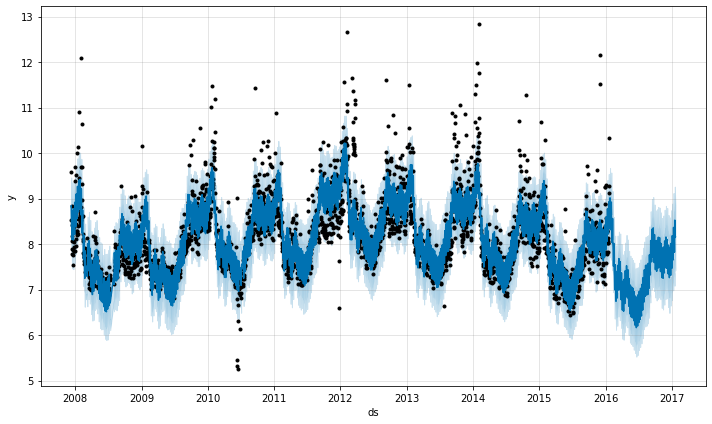

In [11]:
fig1 = m.plot(forecast)

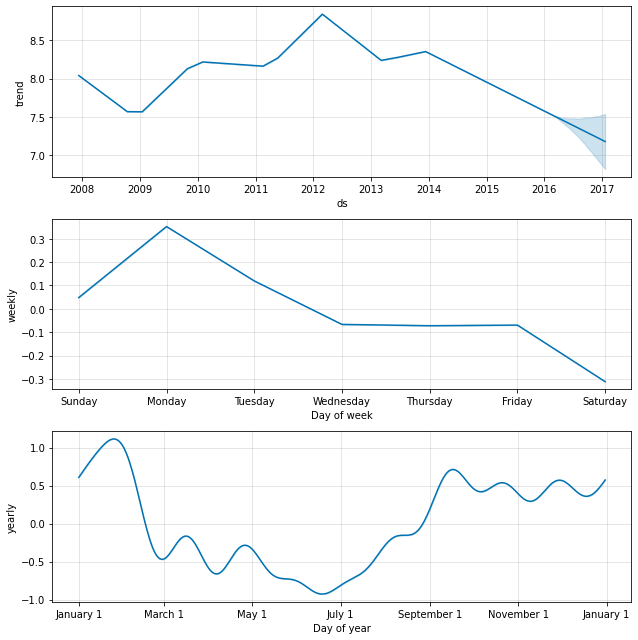

In [12]:
fig2 = m.plot_components(forecast)

In [14]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
# cap 최대 or 최소 값을 줘서 넘지 않게.

In [16]:
df.describe()

,y
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


In [24]:
# 최대값 지정
df['cap'] = 8.5
df.head(1)

,ds,y,cap
0,2007-12-10,9.590761,8.5


In [25]:
m = fb(growth='logistic')
m.fit(df) # 학습을 시킴.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


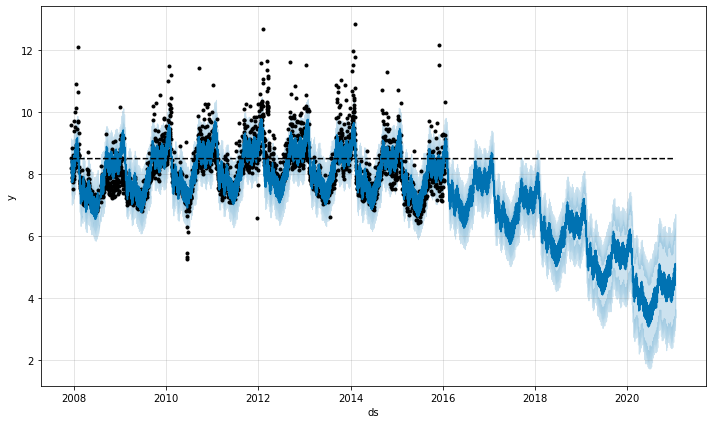

In [26]:
# 5년
future = m.make_future_dataframe(periods=1826 ) # 5년 동안의 예측 
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)  # 최대값 예측 후 그래프